In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from fractions import Fraction
import random
import pandas as pds

In [2]:
# Beth's strategy
def getMax(glasses):
    maximums = []
    
    #Find positions of the maximums
    for i in range(len(glasses)):
        if glasses[i] == max(glasses):
            maximums.append(i) #adding positions of the maximums

    #Find positions of the maximum leftotright of each max, in correspondence to same maximum by position   
    d = []
    for j in range(len(maximums)):
        d.append(maxLR(maximums[j], glasses)) #list of the positions of the max left or rights to the maximums
    
    # finding position of maximum out of the d's
    maxdpos = pds.Series(d).idxmax()
    
    return maximums[maxdpos], d[maxdpos]

    
def maxLR(first, glasses):
    if first + 1 == len(glasses):
        m = 0
    else:
        m = first + 1
    
    if glasses[m] >= glasses[first - 1]: #favours picking the right, could I change this to be random?
        return m #returning position
    
    elif glasses[m] < glasses[first - 1]:
        return first - 1

def bethTurn(newglasses):
    B, b = getMax(newglasses)
    newglasses[B] = 0
    newglasses[b] = 0
    return newglasses

glasses = [9,2,3,8,7,10, 10,8,6,8,7,5,1] #test
glasses = bethTurn(glasses)
print(glasses)

[9, 2, 3, 8, 7, 0, 0, 8, 6, 8, 7, 5, 1]


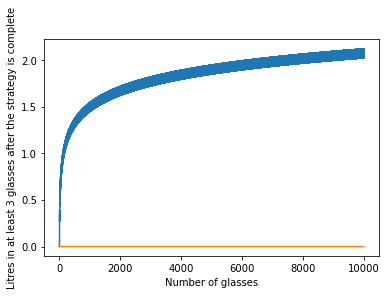

In [3]:
# Computing volume of final glasses for conjecture 4

def evenorodd(number):
    if number % 2 == 0:
        return True
    else:
        return False

def findr(number):
    even = evenorodd(number)
    if even == True:
        return (number - 2) / 2
    else:
        return (number - 1) / 2
    
def stratsum(n):
    n = int(n)
    r = int(findr(n))
    #print("n = ", n, "and r = ", r)
    counter = 0
    for i in range(0, r):
        counter += 1 / (2 * n - 4 * i)
    #print(counter)
    return counter


upto = 10000
x = np.linspace(1, upto, upto)
y = np.zeros(upto)
zerofive = np.zeros(upto)

for i in range(0, len(x)):
    y[i] = stratsum(x[i])
    zerofive[i] = 0.

plt.plot(x,y)
plt.plot(x, zerofive)
plt.xlabel("Number of glasses")
plt.ylabel("Litres in at least 3 glasses after the strategy is complete")
plt.show()

In [ ]:
# Game where user can input Ali and Beth's choices

def glassesPrint(glasses): # a function that collects the 'present' states of the glasses throughout the game
    print("Current state of glasses:")
    print(' '.join(map(str, glasses)))

def overOne(value): # searches for glass that's over 1 litre
    if 1 < value:
        return False

def turnIntoDecimal(m): # converts fraction into decimal
    if '/' not in m:
        return Decimal(m)
    else:
        numdenom = m.split('/')
        number = int(numdenom[0]) / int(numdenom[1])
        return Decimal(number)

def getWater(water, j): # Ali pouring in water in glass j
    print("How much water would you like to pour into glass ", j + 1)
    while True:
        A = input()
        try:
            A = turnIntoDecimal(A)
            if A < 0:
                print("The number you have entered is less than 0")
            elif A > round(water, 8):
                print("There's not enough water to pour")
            else:
                return A
        except:
            print("You have not entered a decimal/fraction/integer")
        
def getBethFirstGlass(newglasses): # Beth's first glass
    print("What's the first glass you'd like to tip away?")
    while True:
        Beth = input()
        try:
            Beth = int(Beth) - 1
            if Beth > len(newglasses) - 1 or Beth < 0:
                print("Enter a number between 1 and :,", len(newglasses))
            else:
                return Beth
        except:
            print("You've not entered an integer")
            
    
def checkRL(first, newglasses): # Finding which glass Beth wants to pour away
    while True:
        R = first + 1
        print("R is",R)
        L = first - 1
        print(len(glasses))
        if L == -1:
            L = len(glasses) - 1
        if R == len(glasses):
            R = 0
            print("R is now: ", R)
        
        if newglasses[R] == 0 and newglasses[L] == 0:
            return R
        
        print("Which adjacent glass would you like to tip away? You can only enter ", L + 1, " or ", R + 1)
        p = input()
        try:
            p = int(p) - 1
            if p != R and p != L:
                print("You've not entered an adjacent glass")
            else:
                return p
        except:
            print("You've not entered a number")

# game

def aliTurn(newglasses, water):
    
    for i in range(len(newglasses)):
        A = getWater(water, i)
        newglasses[i] = newglasses[i] + A
        water = water - A
        
        glassesPrint(glasses)
        
        if 1 < newglasses[i]:
            return False, newglasses
        
        if water == 0:
            return True, newglasses
        
        print("water remaining is ", water)
        print()

    return True, newglasses

def bethTurn(newglasses):
    B = getBethFirstGlass(newglasses)
    b = checkRL(B, newglasses) 
    newglasses[B] = 0
    newglasses[b] = 0
    return newglasses
        
def playGame(underOne, glasses):
    print("Welcome to the Varisty pub game!") 
    while underOne == True:
        
        # Ali's turn
        print("It's now Ali's turn")
        values = aliTurn(glasses, Decimal(0.5))
        underOne, glasses = values
        if underOne == False:
            return "Ali has won"
        print()
        
        # Beth's turn
        print("It's now Beth's turn")
        glasses = bethTurn(glasses)
        glassesPrint(glasses)
        print()


# Menu
n = 8 # number of glasses
zero = Decimal(0)
glasses = [zero] * n

glassesPrint(glasses)
    
underOne = True

playGame(True, glasses)

Current state of glasses:
0 0 0 0 0 0 0 0
Welcome to the Varisty pub game!
It's now Ali's turn
How much water would you like to pour into glass  1
